In [1]:
import numpy as np
from src.plotting import plot
from src.simulation import construct_optimal_solution as sim
from src.query_point_algorithms import (
    uniform_random,
    trim_extremities,
    grid_search,
    nth_degree_voronoi,
)

# Simulate a data set

Solution exists with 10 query points


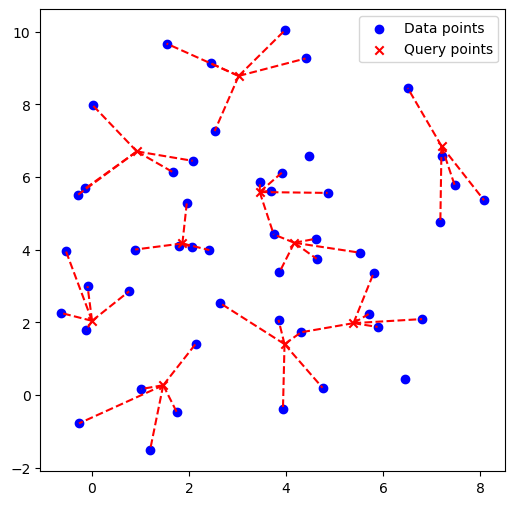

In [3]:
np.random.seed(1)

k_nearest_neighbours = 5
x_bounds = [0, 10]
y_bounds = [0, 10]


query_points, data_points = sim.simulation(
    min_query_points=10,
    max_query_points=10,
    points_per_query_point=k_nearest_neighbours,
    approx_x_bounds=x_bounds,
    approx_y_bounds=y_bounds,
    verbose=False,
)

plot(
    data_points[["x", "y"]].to_numpy(),
    query_points[["x", "y"]].to_numpy(),
    k_nearest_neighbours,
)
print(f"Solution exists with {len(query_points)} query points")

# Voronoi cells (3rd degree)

In [ ]:
vor = nth_degree_voronoi.VoronoiCells(data_points, nth_order=3)

vor.plot(3, x_bounds, y_bounds)

# Uniform random algorithm

In [ ]:
ur_query_points = uniform_random.get_query_points(
    data_points[["x", "y"]], k_nearest_neighbours
)
print(f"Uniform point selection resulted in {len(ur_query_points)} query points")

plot(ur_query_points, data_points[["x", "y"]].to_numpy(), k_nearest_neighbours)

# Trim extremities alrogithm


In [ ]:
tr_query_points = trim_extremities.get_query_points(
    data_points[["x", "y"]], k_nearest_neighbours
)

print(f"Trim extremities algorithm resulted in {len(tr_query_points)} query points")

plot(tr_query_points, data_points[["x", "y"]].to_numpy(), k_nearest_neighbours)

# Grid search algorithm


In [ ]:
from importlib import reload

reload(grid_search)

grid_search.get_query_points(
    data_points=data_points[["x", "y"]],
    k_nearest_neighbours=k_nearest_neighbours,
    x_bounds=[data_points["x"].min(), data_points["x"].max()],
    y_bounds=[data_points["y"].min(), data_points["y"].max()],
    size_of_grid_search=100,
)